# **Note proses pengerjaan coding:**
**I. Data-Preprocessing**
1. Baca Dataset
2. Cek jumlah data kosong
3. Cek tipe data
4. Drop kolom yang memiliki fitur yang gak mempengaruhi label (misalnya nama orang, id, dll)
5. Handle missing value
6. Lakukan encoding untuk data categorical
7. Handle Outlier
8. Lakukan scaling data (hanya untuk data X, para fitur)

**II. Model Selection**
1. Train test split
2. Handle imbalance class untuk data training (X_train,y_train)

**III. Creating machine learning model**
1. Import necessary sklearn libraries
2. train model (pake sklearn.algoritmanya)

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import joblib

In [171]:
df = pd.read_csv('water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [172]:
df.info()
# Alhamdulillah udah aman data typenya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [173]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [174]:
def print_null_report(df):
    for i, j in enumerate(df.isna().sum()):
        print(f'{df.columns[i]:15} | {j*100/len(df):.2f}%')

print_null_report(df)

ph              | 14.99%
Hardness        | 0.00%
Solids          | 0.00%
Chloramines     | 0.00%
Sulfate         | 23.84%
Conductivity    | 0.00%
Organic_carbon  | 0.00%
Trihalomethanes | 4.95%
Turbidity       | 0.00%
Potability      | 0.00%


In [175]:
# Handling missing value (gunakan imputasi untuk semuanya) berdasarkan class
df['ph'] = df.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.mean()))
df['Sulfate'] = df.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.mean()))
df['Trihalomethanes'] = df.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.mean()))

print_null_report(df)

ph              | 0.00%
Hardness        | 0.00%
Solids          | 0.00%
Chloramines     | 0.00%
Sulfate         | 0.00%
Conductivity    | 0.00%
Organic_carbon  | 0.00%
Trihalomethanes | 0.00%
Turbidity       | 0.00%
Potability      | 0.00%


In [176]:
# Handling Outlier

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1

    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    return outliers
    
def print_outlier(df):
    for i in df.columns:
        outliers = check_outlier(df[i])
        print(f'Number of Outliers for {i:16}:  {len(outliers)}')

def handle_outlier(df):
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Drop the outliers
        lower_outliers = np.where(df[i] <= lower_bound)[0]
        upper_outliers = np.where(df[i] >= upper_bound)[0]
        df.drop(index = upper_outliers, inplace = True)
        df.drop(index = lower_outliers, inplace = True)
        df.reset_index(drop=True, inplace=True)
        print(f'Column {i} has been processed')
    
print_outlier(df)

Number of Outliers for ph              :  142
Number of Outliers for Hardness        :  83
Number of Outliers for Solids          :  47
Number of Outliers for Chloramines     :  61
Number of Outliers for Sulfate         :  264
Number of Outliers for Conductivity    :  11
Number of Outliers for Organic_carbon  :  25
Number of Outliers for Trihalomethanes :  54
Number of Outliers for Turbidity       :  19
Number of Outliers for Potability      :  0


In [177]:
handle_outlier(df)

Column ph has been processed
Column Hardness has been processed
Column Solids has been processed
Column Chloramines has been processed
Column Sulfate has been processed
Column Conductivity has been processed
Column Organic_carbon has been processed
Column Trihalomethanes has been processed
Column Turbidity has been processed
Column Potability has been processed


In [178]:
df['Potability'].value_counts()

Potability
0    1664
1     993
Name: count, dtype: int64

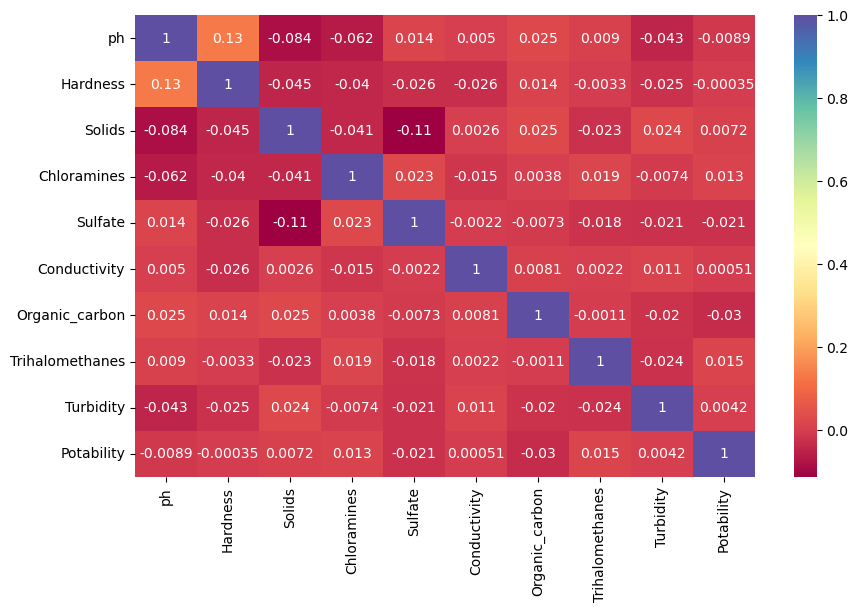

In [179]:
corr = df.corr()

plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Spectral')
plt.show()


In [180]:
corr['Potability'].sort_values(ascending=False)

Potability         1.000000
Trihalomethanes    0.014771
Chloramines        0.012948
Solids             0.007164
Turbidity          0.004178
Conductivity       0.000513
Hardness          -0.000347
ph                -0.008948
Sulfate           -0.021106
Organic_carbon    -0.030161
Name: Potability, dtype: float64

In [181]:
# Data Scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
mm = MinMaxScaler()
rb = RobustScaler()
sc = StandardScaler()
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

X = mm.fit_transform(X)

In [182]:
# create class_weight for XGBoost
n_samples = len(y)
n_classes = len(np.unique(y))

count_pos_class = np.sum(y == 1)

# Calculate scale_pos_weight
scale_pos_weight = n_samples / (n_classes * count_pos_class)

In [183]:
# Model Selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.2, stratify= y)

# Smote (only oversample the training data)
# from imblearn.under_sampling import RandomUnderSampler
# sm = RandomUnderSampler(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)

In [184]:
y_train.value_counts(normalize=True )

Potability
0    0.626353
1    0.373647
Name: proportion, dtype: float64

In [185]:
# Creating the model (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KFold = StratifiedKFold(n_splits=10)
scores = cross_val_score(KNN, X, y, cv = KFold)

print('Cross Validation Score:', scores)
print('Average Cross Validation Score:', scores.mean())

Cross Validation Score: [0.56015038 0.59774436 0.58646617 0.60526316 0.59398496 0.58270677
 0.52631579 0.56226415 0.58867925 0.56603774]
Average Cross Validation Score: 0.576961271102284


In [186]:
# Prediction
from sklearn.metrics import accuracy_score, classification_report
y_pred_KNN = KNN.predict(X_test)

print('The Model accuracy is:', accuracy_score(y_pred_KNN, y_test))
print(classification_report(y_pred_KNN, y_test))
print(KNN.score(X_train, y_train))


The Model accuracy is: 0.6146616541353384
              precision    recall  f1-score   support

           0       0.77      0.67      0.71       382
           1       0.36      0.48      0.41       150

    accuracy                           0.61       532
   macro avg       0.56      0.57      0.56       532
weighted avg       0.65      0.61      0.63       532

0.7369411764705882


In [187]:
# SVM Model plus regularisasi
from sklearn.svm import LinearSVC
l1 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol = 1e-3, class_weight='balanced')
l1.fit(X_train, y_train)

KFold3 = StratifiedKFold(n_splits=10)
scores3 = cross_val_score(l1, X, y, cv = KFold3)

print('Cross Validation Score:', scores3)
print('Average Cross Validation Score:', scores3.mean())

Cross Validation Score: [0.5        0.48496241 0.46616541 0.5075188  0.4887218  0.5075188
 0.46240602 0.47169811 0.52075472 0.49056604]
Average Cross Validation Score: 0.4900312101007236


In [188]:
# Prediction
y_pred_SVM = l1.predict(X_test)
print('The Model accuracy is: ', accuracy_score(y_pred_SVM, y_test))
print(classification_report(y_pred_SVM, y_test))
print(l1.score(X_train, y_train))

The Model accuracy is:  0.4718045112781955
              precision    recall  f1-score   support

           0       0.47      0.60      0.53       262
           1       0.47      0.35      0.40       270

    accuracy                           0.47       532
   macro avg       0.47      0.47      0.46       532
weighted avg       0.47      0.47      0.46       532

0.5152941176470588


In [189]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)      

print('The Model accuracy is: ', accuracy_score(y_test, y_pred_lr))
print(LR.score(X_train, y_train))
print(classification_report(y_test, y_pred_lr))


The Model accuracy is:  0.462406015037594
0.5190588235294118
              precision    recall  f1-score   support

           0       0.59      0.47      0.52       333
           1       0.34      0.45      0.38       199

    accuracy                           0.46       532
   macro avg       0.46      0.46      0.45       532
weighted avg       0.49      0.46      0.47       532



In [190]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', class_weight='balanced')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print('The Model accuracy is: ', accuracy_score(y_test, y_pred))
print('Training score',svc.score(X_train, y_train))
print(classification_report(y_test, y_pred))

The Model accuracy is:  0.6522556390977443
Training score 0.7232941176470589
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       333
           1       0.53      0.56      0.55       199

    accuracy                           0.65       532
   macro avg       0.63      0.63      0.63       532
weighted avg       0.66      0.65      0.65       532



In [191]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

# scale_pos_weight = scale_pos_weight
XGB = XGBClassifier(objective='binary:logistic', seed=42, use_label_encoder=False, scale_pos_weight=scale_pos_weight, random_state=42)

XGB_params1 = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 400, 500],
    'reg_alpha': [0, 0.5, 1],
    'max_depth': [3, 4, 5, 6, 7],
}

XGB_params2 = {
    'eta': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4]
}

XGB_random = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

skf = StratifiedKFold(n_splits=5)

# rs_xgb = GridSearchCV(estimator=XGB, param_grid=XGB_params1, cv=skf)
rs_xgb = RandomizedSearchCV(estimator=XGB, param_distributions=XGB_random, cv=skf, n_jobs=-1, verbose=1, random_state=42)

rs_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='aucpr', eval_set = [(X_test, y_test)])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	validation_0-aucpr:0.79452
[1]	validation_0-aucpr:0.80265
[2]	validation_0-aucpr:0.80730
[3]	validation_0-aucpr:0.81467
[4]	validation_0-aucpr:0.82028
[5]	validation_0-aucpr:0.82182
[6]	validation_0-aucpr:0.82399
[7]	validation_0-aucpr:0.82435
[8]	validation_0-aucpr:0.82285
[9]	validation_0-aucpr:0.82758
[10]	validation_0-aucpr:0.82923
[11]	validation_0-aucpr:0.82805
[12]	validation_0-aucpr:0.82821
[13]	validation_0-aucpr:0.82892
[14]	validation_0-aucpr:0.82794
[15]	validation_0-aucpr:0.82916
[16]	validation_0-aucpr:0.82988
[17]	validation_0-aucpr:0.83083
[18]	validation_0-aucpr:0.83373
[19]	validation_0-aucpr:0.83335
[20]	validation_0-aucpr:0.83457
[21]	validation_0-aucpr:0.83561
[22]	validation_0-aucpr:0.83493
[23]	validation_0-aucpr:0.83487
[24]	validation_0-aucpr:0.83539
[25]	validation_0-aucpr:0.83523
[26]	validation_0-aucpr:0.83506
[27]	validation_0-aucpr:0.83592
[28]	validation_0-aucpr:0.83656
[29]	validation_0-auc

c:\Users\kevin_9brmunc\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\kevin_9brmunc\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-aucpr:0.83858
[45]	validation_0-aucpr:0.83864
[46]	validation_0-aucpr:0.83745
[47]	validation_0-aucpr:0.84086
[48]	validation_0-aucpr:0.84047


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           impor...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42, verbose=1)

In [192]:
xgb = rs_xgb.best_estimator_
# print(xgb)

y_pred_xgb = xgb.predict(X_test)
print('Model best score', rs_xgb.best_score_)
print('The Model accuracy is: ', accuracy_score(y_test, y_pred_xgb))
print('Training score:', xgb.score(X_train, y_train))
print('Cross Validation Score:',cross_val_score(XGB, X_train, y_train, cv=skf))
# Print average cross val score
print('\nClassification Report:')
print(classification_report(y_test, y_pred_xgb))

Model best score 0.7788235294117647
The Model accuracy is:  0.7969924812030075
Training score: 0.9171764705882353


Cross Validation Score: [0.74823529 0.75058824 0.76470588 0.74117647 0.73882353]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       333
           1       0.76      0.67      0.71       199

    accuracy                           0.80       532
   macro avg       0.79      0.77      0.78       532
weighted avg       0.79      0.80      0.79       532



In [193]:
import pickle as pkl
filename = 'xgb_model.pkl'
# pkl.dump(xgb, open(filename, 'wb'))

In [194]:
# pkl.dump(mm, open('scaler.pkl', 'wb'))

In [195]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [196]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000,2657.000000
mean,7.078005,196.987221,21465.542889,7.111240,333.857214,425.738024,14.326481,66.475644,3.962308,0.373730
std,1.214610,28.266583,7873.882113,1.410896,26.268501,79.907395,3.224768,14.976572,0.761498,0.483884
min,3.902476,118.988579,320.942611,3.194969,268.646941,201.619737,5.362371,26.140863,1.872573,0.000000
25%,6.353437,178.998245,15613.160533,6.192193,319.737009,365.626487,12.095251,56.949724,3.439476,0.000000
50%,7.085378,197.517093,20574.364258,7.116809,334.564290,421.220228,14.243374,66.303555,3.947138,0.000000
75%,7.793834,215.648216,26730.192613,8.051538,347.930400,481.318803,16.584571,76.694580,4.494544,1.000000
max,10.252816,275.679780,44376.187382,10.999995,399.617217,652.537592,23.373265,107.306343,6.083772,1.000000
